<a href="https://colab.research.google.com/github/Gautam-git1050/HELMET-MONITORING/blob/main/HELMET_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 "/content/gdrive/MyDrive/traindata"

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy13.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy130.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1300.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1301.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1302.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1303.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1304.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1305.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1306.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1307.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1308.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy1309.jpg  
  inflating: /content/gdrive/MyDrive/traindata/train/toys/toy131.jpg  
  inflating: /con

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 5.1 MB/s 
     |████████████████████████████████| 120 kB 49.3 MB/s 
     |████████████████████████████████| 3.4 MB 42.5 MB/s 
     |████████████████████████████████| 1.2 MB 36.5 MB/s 
     |████████████████████████████████| 840 kB 45.6 MB/s 
     |████████████████████████████████| 6.4 MB 33.4 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 596 kB 49.2 MB/s 
     |████████████████████████████████| 234 kB 53.9 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 25.3 MB 63.1 MB/s 
     |████████████████████████████████| 352 kB 54.0 MB/s 
     |████████████████████████████████| 99 kB 9.5 MB/s 
     |████████████████████████████████| 47.7 MB 94 kB/s 
     |████████████████████████████████| 462 kB 49.3 MB/s 
     |███████████████

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
image_path = "/content/gdrive/MyDrive/Data/"
#image_path = os.path.join(os.path.dirname(image_path), 'data')

In [ ]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 83, num_label: 2, labels: ABSENT, PRESENT.


In [ ]:
train_data, rest_data = data.split(0.9)
validation_data, test_data = rest_data.split(0.1)

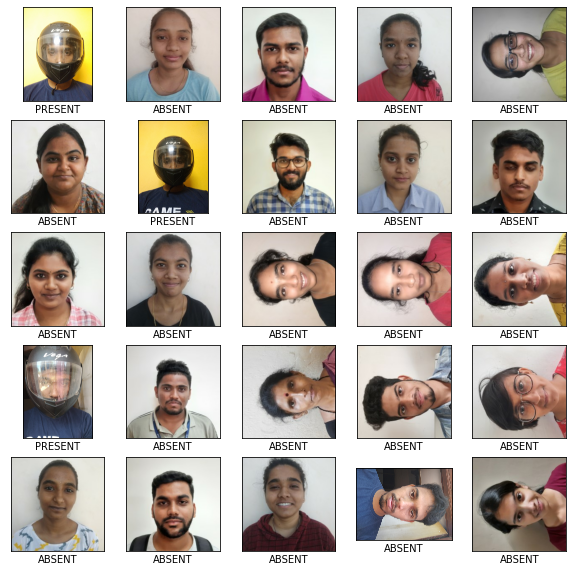

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'),epochs=5)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 15s 134ms/step - loss: 0.5865 - accuracy: 0.6719
Epoch 2/5
2/2 [==============================] - 2s 1s/step - loss: 0.3251 - accuracy: 0.9219
Epoch 3/5
2/2 [==============================] - 3s 1s/step - loss: 0.2539 - accuracy: 0.9844
Epoch 4/5
2/2 [==============================] - 2s 1s/step - loss: 0.2588 - accuracy: 0.9844
Epoch 5/5
2/2 [==============================] - 2s 1s/step - loss: 0.2790 - accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             2257984   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________





Evaluate 

In [ ]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 3s 3s/step - loss: 0.2441 - accuracy: 1.0000


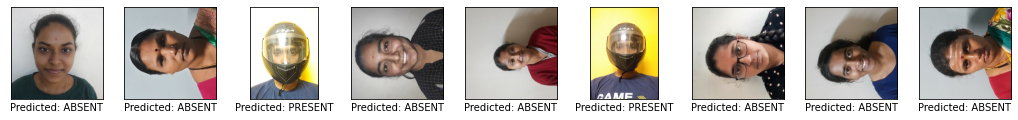

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp72wfhtmn/assets


INFO:tensorflow:Assets written to: /tmp/tmp72wfhtmn/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpcgauxr7_/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpcgauxr7_/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 1.0}